In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

with open('decision-tree-classifier.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model.feature_importances_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 98.56% (0.9856094236653548)
Top 20 features:
       feature    weight
0         city  0.042771
70         lnr  0.042771
81        rifl  0.042771
80        show  0.042771
79  lukashenko  0.042771
78        serv  0.042771
77    campaign  0.042771
76        bank  0.042771
75   melitopol  0.042771
74       steel  0.042771
73        seiz  0.042771
72        town  0.042771
71         gur  0.042771
69    withdraw  0.042771
83        spac  0.042771
68    servicem  0.042771
67      negoty  0.042771
66       t1302  0.042771
65         dnr  0.042771
64        tank  0.042771


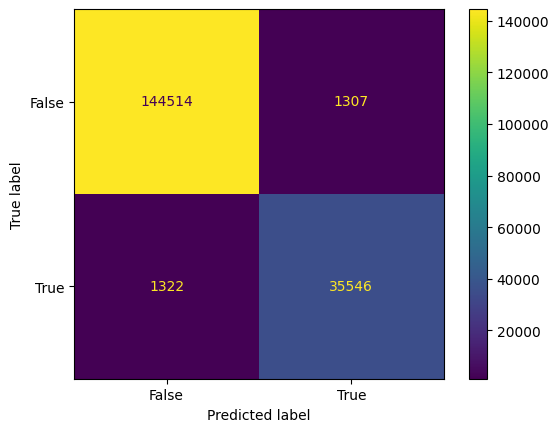

In [4]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()